# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [66]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [67]:
billboard_data = pd.read_csv('/Users/cjmdsn/DSI-course-materials/curriculum/03-projects/01-projects-weekly/project-02/assets/billboard.csv')

In [68]:
billboard_data=billboard_data.rename(columns= {'artist.inverted': "artist"}) #renaming columns
billboard_data=billboard_data.rename(columns= {'date.entered': "start_date"})
billboard_data=billboard_data.rename(columns= {'date.peaked': "peak_date"})
peak_value=[] #creating a variable for the highest value a song reached on the charts
for i in range(billboard_data.shape[0]):
    peak = billboard_data.iloc[i].min()
    peak_value.append(int(peak))
billboard_data["start_date"]=pd.to_datetime(billboard_data["start_date"])
billboard_data["peak_date"]=pd.to_datetime(billboard_data["peak_date"])
start_month=[]
start_season=[] #creating a variable for the season the song started on the charts
for i in range(billboard_data.shape[0]):
    month = billboard_data["start_date"][i].month
    start_month.append(month)
for value in start_month:
    if value <3 or value == 12:
        start_season.append("Winter")
    elif value >2 and value <6:
        start_season.append("Spring")
    elif value >5 and value <9:
        start_season.append("Summer")
    else:
        start_season.append("Fall")
billboard_data["season"] = start_season
billboard_data["weeks_on"]= billboard_data.notnull().sum(axis=1) #created a variable for how long a song was on the charts
billboard_data['peak_value'] = peak_value
columns_list=billboard_data.columns.values.tolist()
columns_list.insert(7, columns_list.pop(-3)) #rearranged columns
columns_list.insert(8, columns_list.pop(-2))
columns_list.insert(9, columns_list.pop(-1))
billboard_data=billboard_data[columns_list]
weekly_position = columns_list[10:] #renamed the weekly position ranks
for i in range(76):
    if i<10:
        billboard_data=billboard_data.rename(columns= {weekly_position[i]: weekly_position[i][1:4]})
    else:
        billboard_data=billboard_data.rename(columns= {weekly_position[i]: weekly_position[i][1:5]})
billboard_data=billboard_data.drop("year",1)#dropped each column with no relevant data
billboard_data=billboard_data.drop("66th",1)
billboard_data=billboard_data.drop("67th",1)
billboard_data=billboard_data.drop("68th",1)
billboard_data=billboard_data.drop("69th",1)
billboard_data=billboard_data.drop("70th",1)
billboard_data=billboard_data.drop("71st",1)
billboard_data=billboard_data.drop("72nd",1)
billboard_data=billboard_data.drop("73rd",1)
billboard_data=billboard_data.drop("74th",1)
billboard_data=billboard_data.drop("75th",1)
billboard_data=billboard_data.drop("76th",1)


In [69]:
#create different slices of the dataset, based on a certain segment of interest
misc_data = billboard_data.loc[(billboard_data['genre'] =="Gospel") | (billboard_data['genre'] =="Jazz") | (billboard_data['genre'] =="Reggae")]
electronica_data = billboard_data.loc[billboard_data['genre'] =="Electronica"]
country_data = billboard_data.loc[billboard_data['genre'] =="Country"]
pop_data = billboard_data.loc[billboard_data['genre'] =="Pop"]
rb_data = billboard_data.loc[billboard_data['genre'] =="R&B"]
rap_data = billboard_data.loc[billboard_data['genre'] =="Rap"]
rock_data = billboard_data.loc[billboard_data['genre'] =="Rock"]
chart_toppers_data = billboard_data.loc[billboard_data['peak_value'] == 1]
top_5_data = billboard_data.loc[(billboard_data['peak_value'] >1) & (billboard_data['peak_value'] <6)]
top_10_data = billboard_data.loc[(billboard_data['peak_value'] >5) & (billboard_data['peak_value'] <11)]
top_15_data = billboard_data.loc[(billboard_data['peak_value'] >10) & (billboard_data['peak_value'] <16)]
top_20_data = billboard_data.loc[(billboard_data['peak_value'] >15) & (billboard_data['peak_value'] <21)]
top_25_data = billboard_data.loc[(billboard_data['peak_value'] >20) & (billboard_data['peak_value'] <26)]
bottom_75_data = billboard_data.loc[billboard_data['peak_value'] >25]
spring_data = billboard_data.loc[billboard_data["season"] == "Spring"]
summer_data = billboard_data.loc[billboard_data["season"] == "Summer"]
fall_data = billboard_data.loc[billboard_data["season"] == "Fall"]
winter_data = billboard_data.loc[billboard_data["season"] == "Winter"]


In [64]:
# rough proxy for probability of making the top 100, by genre
print(len(rock_data['peak_value']), float(137)/317)
print(len(country_data['peak_value']), float(74)/317)
print(len(rap_data['peak_value']), float(58)/317)
print(len(rb_data['peak_value']), float(23)/317)

(137, 0.43217665615141954)
(74, 0.2334384858044164)
(58, 0.1829652996845426)
(23, 0.07255520504731862)


count    137.000000
mean      36.072993
std       30.703907
min        1.000000
25%        6.000000
50%       28.000000
75%       64.000000
max       99.000000
Name: peak_value, dtype: float64
count    74.000000
mean     49.554054
std      20.904310
min       1.000000
25%      34.250000
50%      44.500000
75%      68.000000
max      92.000000
Name: peak_value, dtype: float64
count    23.000000
mean     59.304348
std      25.848219
min      14.000000
25%      38.000000
50%      59.000000
75%      81.500000
max      99.000000
Name: peak_value, dtype: float64
count    58.000000
mean     52.362069
std      30.469253
min       2.000000
25%      23.500000
50%      55.500000
75%      75.000000
max      99.000000
Name: peak_value, dtype: float64


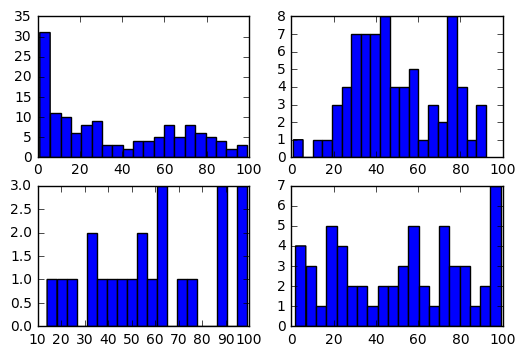

In [70]:
#looking at the distribution of peaks values based on genre
print(rock_data['peak_value'].describe())
print(country_data['peak_value'].describe())
print(rb_data['peak_value'].describe())
print(rap_data['peak_value'].describe())
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.hist(rock_data['peak_value'], bins=20)
ax2.hist(country_data['peak_value'], bins=20)
ax3.hist(rb_data['peak_value'], bins=20)
ax4.hist(rap_data['peak_value'], bins=20)
plt.show()

In [71]:
#looking at the shape of the peak value distribution, by genre
print (rock_data['peak_value'].mean(),rock_data['peak_value'].std())
print (country_data['peak_value'].mean(),country_data['peak_value'].std())
print (rap_data['peak_value'].mean(),rap_data['peak_value'].std())
print (rb_data['peak_value'].mean(),rb_data['peak_value'].std())

(36.07299270072993, 30.703907357326674)
(49.554054054054056, 20.9043102928309)
(52.36206896551724, 30.469252995444826)
(59.30434782608695, 25.848219180102305)


In [72]:
#looking at the distribution of genres by peak value
print(chart_toppers_data['genre'].value_counts())
print(top_5_data['genre'].value_counts())
print(top_10_data['genre'].value_counts())
print(top_15_data['genre'].value_counts())
print(top_20_data['genre'].value_counts())
print(top_25_data['genre'].value_counts())
print(bottom_75_data['genre'].value_counts())

Rock       15
Country     1
Latin       1
Name: genre, dtype: int64
Rock     16
Rap       4
Latin     1
Pop       1
Name: genre, dtype: int64
Rock           11
Rap             1
Jazz            1
Electronica     1
Name: genre, dtype: int64
Rock       10
Rap         3
Latin       1
Country     1
R&B         1
Name: genre, dtype: int64
Rock       6
Rap        3
Country    2
R&B        1
Name: genre, dtype: int64
Rock       8
Rap        5
Pop        3
Country    3
R&B        1
Latin      1
Name: genre, dtype: int64
Rock           71
Country        67
Rap            42
R&B            20
Pop             5
Latin           5
Electronica     3
Gospel          1
Reggae          1
Name: genre, dtype: int64


In [73]:
#looking at the distribution of genres by season
print(spring_data['genre'].value_counts()) 
print(summer_data['genre'].value_counts())
print(fall_data['genre'].value_counts())
print(winter_data['genre'].value_counts())

Rock           37
Country        21
Rap            10
R&B             7
Latin           3
Pop             2
Electronica     1
Name: genre, dtype: int64
Rock           32
Country        15
Rap            14
R&B             7
Pop             4
Gospel          1
Electronica     1
Name: genre, dtype: int64
Rock           33
Country        21
Rap            17
Latin           3
R&B             3
Pop             2
Reggae          1
Electronica     1
Name: genre, dtype: int64
Rock           35
Country        17
Rap            17
R&B             6
Latin           3
Pop             1
Jazz            1
Electronica     1
Name: genre, dtype: int64


In [65]:
#breaking down the rock data by season (rock is the obvious genre choice, as it has the best probability of being on the topp 100, best probability of being on the top, and is heavily positively skewed)
spring_rock_data = spring_data.loc[spring_data['genre'] =="Rock"]
summer_rock_data = summer_data.loc[summer_data['genre'] =="Rock"]
fall_rock_data = fall_data.loc[fall_data['genre'] =="Rock"]
winter_rock_data = winter_data.loc[winter_data['genre'] =="Rock"]
print(spring_rock_data.describe())
print(summer_rock_data.describe())
print(fall_rock_data.describe())
print(winter_rock_data.describe())
#something isn't right here, as the number of entries in each slices doesn't equal the value count above.

        weeks_on  peak_value        1st        2nd        3rd         4th  \
count  37.000000   37.000000  37.000000  37.000000  37.000000   36.000000   
mean   28.216216   33.405405  76.540541  67.000000  60.594595   54.694444   
std    12.076458   30.381335  16.664324  18.675593  20.960889   22.586746   
min    11.000000    1.000000  25.000000  15.000000  12.000000   11.000000   
25%    17.000000    7.000000  63.000000  58.000000  48.000000         NaN   
50%    28.000000   24.000000  81.000000  70.000000  62.000000         NaN   
75%    34.000000   61.000000  86.000000  82.000000  72.000000         NaN   
max    61.000000   91.000000  99.000000  98.000000  98.000000  100.000000   

             5th        6th        7th        8th  ...   56th  57th  58th  \
count  34.000000  33.000000  30.000000  30.000000  ...    0.0   0.0   0.0   
mean   48.911765  45.848485  39.600000  38.433333  ...    NaN   NaN   NaN   
std    23.350255  25.087498  24.802113  26.440151  ...    NaN   NaN   NaN  

##### Write a brief description of your data, and any interesting observations you've made thus far. 

In [ ]:
#Genre distribution stays the same over the different seasons
#If you want to make it to the top, you better be in rock or rap (country and r&b don't make it)
#Genre labels are misleading, as boy bands (N*SYNC, BackStreet Boys) are considered rock
#Rock has a huge amount of market share (43% of the chart)
#Rock has the vast majority of songs at the top of the chart

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, check for missing values (and replace them if it makes sense to do so). Explain your rationale for the way you choose to "impute" the missing data.

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [83]:
columns_list=billboard_data.columns.values.tolist()
weekly_position = columns_list[10:]
massaged_data=pd.melt(billboard_data,id_vars='artist', value_vars=weekly_position)
print(massaged_data)

                    artist variable  value
0          Destiny's Child      1st   78.0
1                  Santana      1st   15.0
2            Savage Garden      1st   71.0
3                  Madonna      1st   41.0
4      Aguilera, Christina      1st   57.0
5                    Janet      1st   59.0
6          Destiny's Child      1st   83.0
7        Iglesias, Enrique      1st   63.0
8                    Sisqo      1st   77.0
9                 Lonestar      1st   81.0
10                  N'Sync      1st   82.0
11     Aguilera, Christina      1st   71.0
12        Vertical Horizon      1st   70.0
13                   Creed      1st   84.0
14                 Aaliyah      1st   59.0
15         matchbox twenty      1st   60.0
16           Carey, Mariah      1st   82.0
17             Hill, Faith      1st   81.0
18                     Mya      1st   72.0
19                   Dream      1st   99.0
20           Braxton, Toni      1st   63.0
21           Anthony, Marc      1st   77.0
22         

## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

In [ ]:
#Say you're a smart, risk taking, opportunistic music artist. What should you do to make the most money? (Position on the Billboard 100 is based on CD sales, although it also includes airplay)


## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

In [ ]:
#-What does the music landscape look like at this point in time? Who are you competing with? (Look at the distribution of genres across the board, see what songs are at the top of the charts)
#-What genre of music should you make? (Which genres populate the top of the chart?) (Probability of making the chart based on genre distribution, peak expectation of each genre)
#-When should you release your song/album?
#-Rough profit maximizing equation = P(making the top 100(by genre)) * E(position on top 100 (by genre)) * E(position (by season))
#-For a complete maximizing equation we would need to take into account the payoff at each position on the board on a weekly basis, and factor in how long a song might stay on the charts

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 